# Trivial Example of Reservoir Computing Using ESNs and ReservoirPy

In [1]:
import reservoirpy as rpy # for reservoir computing
import matplotlib.pylab as plt # for data visualization
import scipy.sparse as sparse # for sparse matrix visualization
import pandas as pd # for ease of data processing
import networkx as nx # for network visualization
import numpy as np # for matrix and array representation

rpy.verbosity(0)
rpy.set_seed(42)

In [2]:
from reservoirpy.nodes import Reservoir # reservoir class
from reservoirpy.nodes import Ridge # readout class

Create input and training data. Input data is 1 value: the amplitude of a sine wave at a given time. We will be making a network that predicts a future value of the sine wave given the current value of a sine wave. This example is extremely simple, and doesn't require ESNs, but it is a simple introduction, and allows for exploration of the training process and the lower level representation of the network within ReservoirPy.

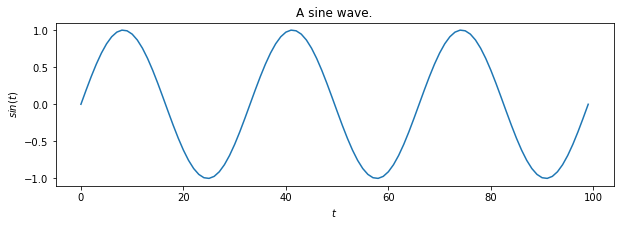

In [3]:
# create simple input data
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

plt.figure(figsize=(10, 3))
plt.title("A sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

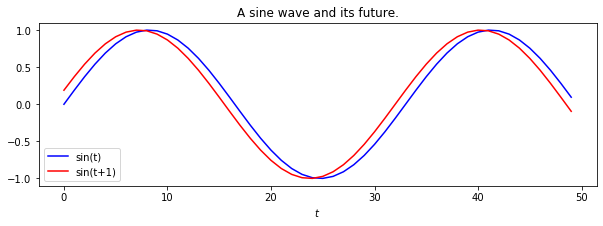

In [4]:
# create training data
X_train = X[:50]
Y_train = X[1:51]

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show()

Define the network

In [5]:
# create a reservoir with 20 nodes
reservoir = Reservoir(20, lr=0.5, sr=0.9)
# create a readout layer
ridge = Ridge(ridge=1e-7)

# connect the reservoir to the readout layer
esn_model = reservoir >> ridge

reservoir = esn_model.nodes[0]
ridge = esn_model.nodes[1]

print(reservoir)
print(ridge)

'Reservoir-0': Reservoir(lr=0.5, sr=0.9, input_scaling=1.0, bias_scaling=1.0, fb_scaling=1.0, rc_connectivity=0.1, input_connectivity=0.1, fb_connectivity=0.1, noise_in=0.0, noise_rc=0.0, noise_out=0.0, noise_type=normal, activation=<function tanh at 0x7fd62b20f700>, fb_activation=<function identity at 0x7fd62b20f820>, units=20, noise_generator=functools.partial(<function noise at 0x7fd61e7f1ee0>, seed=None), in=None, out=20)
'Ridge-0': Ridge(ridge=1e-07, input_bias=True, in=None, out=None)


In [6]:
# at this point, we've defined how many nodes we want in the reservoir, but that's it
# if we try to view the internal matrices that represent the reservoir and the readout, 
# we will not be able to see anything useful

s = reservoir.state()

print(s)
print(reservoir.Win)
print(reservoir.W)
print(ridge.Wout)


None
None
None
None


In [7]:
# we have to feed the reservoir one piece of input data. After this the weights of the Win matrix 
# and the W matrix will be initialized. These weights do not change after being initialized.

s = reservoir(X[0].reshape(1, -1))

In [8]:
print(s)

[[0.         0.38079708 0.38079708 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [9]:
print(reservoir.Win)

  (8, 0)	1.0
  (12, 0)	1.0


In [10]:
print(reservoir.W)

  (0, 14)	0.4820666031834695
  (0, 15)	-0.8646552169046188
  (0, 17)	0.3973392109037437
  (1, 7)	-0.7681376557172982
  (2, 18)	0.5906510285711709
  (4, 14)	-0.28959017811256216
  (5, 1)	0.07908918655510375
  (8, 2)	-0.433028914978869
  (8, 12)	-0.21667190426119157
  (9, 3)	-0.12966532563623606
  (9, 4)	-0.1864903452845235
  (9, 13)	-1.1406425708095027
  (9, 16)	0.5377276632844804
  (10, 5)	-0.6232011751180133
  (10, 9)	-0.586856954916336
  (10, 17)	-0.4510798852198759
  (11, 1)	-0.20967387868564819
  (11, 8)	-0.9876545342152883
  (12, 1)	0.42788469849979216
  (12, 8)	0.424022730269553
  (12, 10)	0.19596400134753242
  (12, 12)	1.0132653929712525
  (13, 9)	-0.22698376783001467
  (14, 1)	0.3681478456594636
  (14, 3)	0.1573580397317963
  (14, 13)	-0.2363644945225135
  (14, 15)	0.5815327076378972
  (15, 7)	0.10745758457082347
  (15, 9)	-0.3133802426654398
  (15, 14)	0.3369736142200517
  (15, 17)	0.14822627834131172
  (16, 1)	0.15155219130891892
  (16, 8)	0.4601649664169967
  (16, 12)	0.0458

In [11]:
# however, without training, the readout layer dimensions are not defined
print(ridge)

# the weights on the readout layer are not yet initialized
print(ridge.Wout)

'Ridge-0': Ridge(ridge=1e-07, input_bias=True, in=None, out=None)
None


In [12]:
# train the esn model
esn_model = esn_model.fit(X_train, Y_train, warmup=10)

# now we see that the readout has 20 edges - connecting each node in the resevoir to the readout
print(ridge)

# now we see that the Wout weights are trained
print(ridge.Wout)

'Ridge-0': Ridge(ridge=1e-07, input_bias=True, in=20, out=1)
[[ 5.00016316e+01]
 [ 1.77129398e+01]
 [-1.91950385e+01]
 [ 0.00000000e+00]
 [-4.61385000e+01]
 [ 1.06618978e+01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.62648427e+00]
 [ 2.38138555e+01]
 [ 4.51401919e+01]
 [ 9.10526760e-01]
 [ 6.85698551e-03]
 [ 2.07852141e+01]
 [-4.93621096e+01]
 [ 8.54045798e+00]
 [-4.17602892e+00]
 [-1.61843695e+00]
 [ 3.93956811e+01]
 [-4.26987700e+00]]


In [13]:
print(reservoir.is_initialized, ridge.is_initialized, ridge.fitted)

True True True


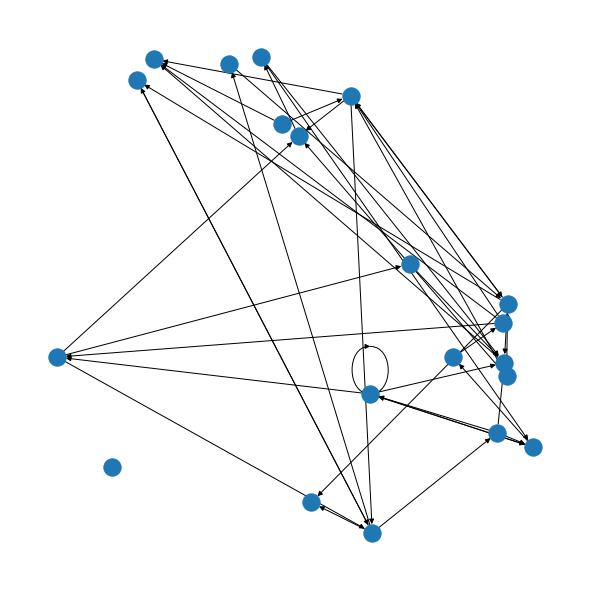

In [14]:
# visualization the reservoir network
input_data = pd.DataFrame(reservoir.W.toarray())
G = nx.DiGraph(input_data.values)
plt.figure(3,figsize=(8,8)) 
nx.draw(G)

Use the model for prediction

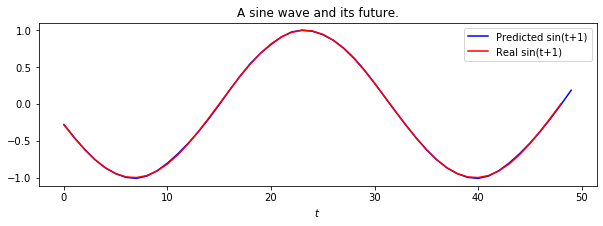

In [15]:
Y_pred = esn_model.run(X[50:])

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t+1)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()